3. Úvod do lineární algebry

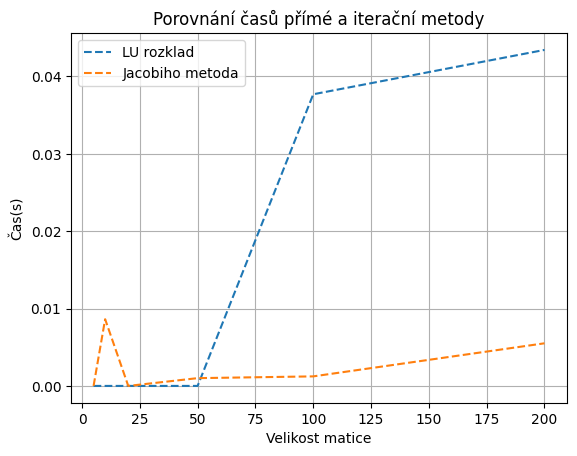

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.linalg as la

#jacobiho metoda
def jacobi(A, b, niteraci, x0): 
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - np.matmul((L + U),x))/D    
        #print("iterace:",i, "x=",x)
    return x

#generátor random matic
def Vygeneruj_random_matice(pocet, radky, sloupce):
    pole_matic = []
    for index in range(pocet):
        matrix = np.random.randint(0,10,size=(radky,sloupce))
        pole_matic.append(matrix)
        radky+=1
        sloupce+=1
    return pole_matic

# seznam velikosti matic
velikosti_matic = [5, 10, 20, 50, 100, 200]

#vytvorime si seznamy pro ukládání časů
casy1 = []
casy2 = []

# Iterace přes různé velikosti matic
for velikost in velikosti_matic:
    #vytvoříme si random matice o dané velikost
    A = np.random.rand(velikost, velikost)
    b = np.random.rand(velikost)
    
    # Aby byla matice A je diagonálně dominantní
    A += velikost * np.eye(velikost)
    
    # Měření času pro přímou metodu (LU rozklad)
    start_time = time.time()
    la.solve(A,b)
    end_time = time.time()-start_time
    casy1.append(end_time)
    
    # Měření času pro Jacobiho metodu
    start_time = time.time()
    jacobi(A, b, 10,np.ones(len(A)))
    end_time = time.time()-start_time
    casy2.append(end_time)


plt.plot(velikosti_matic, casy1, label='LU rozklad', marker='', linestyle='--')
plt.plot(velikosti_matic, casy2, label='Jacobiho metoda', marker='', linestyle='--')

plt.title('Porovnání časů přímé a iterační metody')
plt.xlabel('Velikost matice')
plt.ylabel('Čas(s)')
plt.legend()
plt.grid(True)
plt.show()
